In [2]:
import pandas as pd
import numpy as np

In [40]:
train_data = pd.read_csv(
    r"C:\Users\cw\ML_Projects\NewsEmotion\train.txt",
    sep=";",
    names=["text", "emotion"],
    engine="python"
).dropna()

test_data = pd.read_csv(
    r"C:\Users\cw\ML_Projects\NewsEmotion\test.txt",
    sep=";",
    names=["text", "emotion"],
    engine="python"
).dropna()

In [41]:
print("Training Data")
train_data.head()

Training Data


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [42]:
print("Testing Data")
test_data.head() 

Testing Data


,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [43]:
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

print("\nEmotion distribution:\n")
print(train_data['emotion'].value_counts())

Train shape: (16000, 2)
Test shape: (2000, 2)

Emotion distribution:

emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


## Splitting training and testing data

In [44]:
X_train = train_data["text"]
y_train = train_data["emotion"]

X_test  = test_data["text"]
y_test  = test_data["emotion"]

## Text → Numbers (TF-IDF)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

## Train Naive Bayes Model

In [47]:
from sklearn.naive_bayes import MultinomialNB

mn = MultinomialNB()
mn.fit(X_train_vec, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


## Model Evalution

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
y_pred = mn.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.766

Classification Report:

              precision    recall  f1-score   support

       anger       0.96      0.56      0.71       275
        fear       0.89      0.52      0.66       224
         joy       0.72      0.98      0.83       695
        love       0.97      0.25      0.39       159
     sadness       0.74      0.93      0.83       581
    surprise       1.00      0.05      0.09        66

    accuracy                           0.77      2000
   macro avg       0.88      0.55      0.58      2000
weighted avg       0.81      0.77      0.73      2000



## Confusion Matrix

In [50]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[155,   3,  49,   0,  68,   0],
       [  5, 117,  43,   0,  59,   0],
       [  0,   0, 680,   1,  14,   0],
       [  1,   0,  90,  39,  29,   0],
       [  1,   1,  41,   0, 538,   0],
       [  0,  10,  38,   0,  15,   3]])

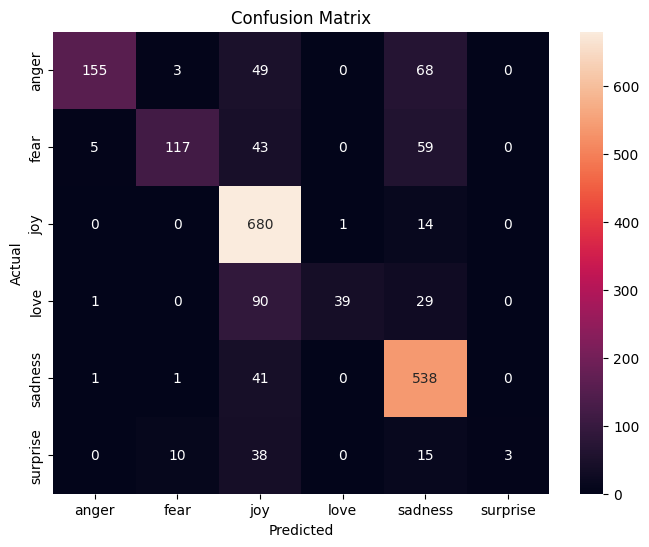

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=mn.classes_,
            yticklabels=mn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

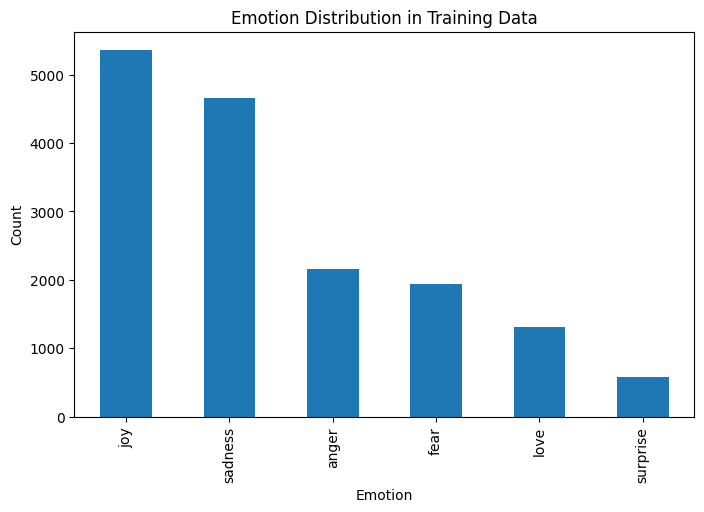

In [52]:
import matplotlib.pyplot as plt

emotion_counts = train_data['emotion'].value_counts()

plt.figure(figsize=(8,5))
emotion_counts.plot(kind='bar')
plt.title("Emotion Distribution in Training Data")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

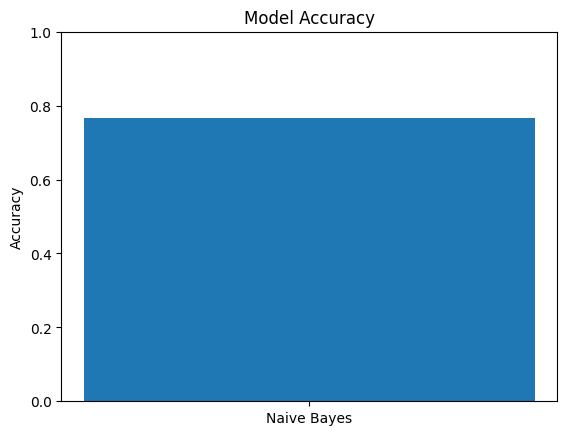

In [53]:
accuracy = accuracy_score(y_test, y_pred)

plt.bar(["Naive Bayes"], [accuracy])
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.ylim(0,1)
plt.show()

## Predict Emotion for Custom Headlines

In [54]:
custom_headlines = [
    "Government announces strict lockdown due to rising cases",
    "I am so excited to start my new job tomorrow",
    "The accident left everyone shocked and scared",
    "This decision makes me extremely angry"
]

custom_vec = vectorizer.transform(custom_headlines)
predictions = mn.predict(custom_vec)

for text, emotion in zip(custom_headlines, predictions):
    print(f"Text: {text}")
    print(f"Predicted Emotion: {emotion}\n")


Text: Government announces strict lockdown due to rising cases
Predicted Emotion: sadness

Text: I am so excited to start my new job tomorrow
Predicted Emotion: joy

Text: The accident left everyone shocked and scared
Predicted Emotion: fear

Text: This decision makes me extremely angry
Predicted Emotion: anger



In [55]:
import pickle
pickle.dump(mn,open('model.pkl','wb'))

In [56]:
from sklearn.pipeline import Pipeline
import pickle

pipeline = Pipeline([
    ("tfidf", vectorizer),
    ("model", mn)
])

pickle.dump(pipeline, open("model.pkl", "wb"))

print("Pipeline model saved successfully!")


Pipeline model saved successfully!
